# Introduction to Data Science - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 31, 11:59pm.

In this homework you will read in and analyze a games dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name:* Carter   
*Last Name:* Hardy   
*E-mail:* u1538956@umail.utah.edu   
*UID:* u1538956  


In [2]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of an Iphone Strategy Games dataset.

### Task 1.1: Read in the data

Parse the file [games.csv](games.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "Rating" and the "Number of Ratings" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

In [3]:
# initialize the top-level array
games = []
header = []
with open('games.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        print("Row: " + str(row))
        games.append(row)
        
header = games.pop(0)

for row in games:
    try:
        row[3] = float(row[3])
        row[4] = int(row[4])
    except ValueError:
        row[3] = None
        row[4] = None


Row: ['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']
Row: ['Boom Beach: War Strategy Game', '672150402', 'Free', '4.70967', '287246', 'Supercell Oy', '604057600', '12', '9+', 'Action', '2014']
Row: ['State.io - Conquer the World', '1559032748', 'Free', '4.54875', '198271', 'AI GAMES FZ LLC', '274869248', '13', '12+', 'Strategy', '2021']
Row: ['Two Spies', '1466304408', 'Free', '4.74081', '11235', 'Royal Pixel Service, Ltd.', '92142592', '13', '9+', 'Board', '2019']
Row: ['Forge of Empires: Build a City', '711455226', 'Free', '4.60095', '164179', 'InnoGames GmbH', '388532224', '12', '9+', 'Entertainment', '2014']
Row: ['Clash of Clans', '529479190', 'Free', '4.75467', '2571858', 'Supercell Oy', '420755456', '12', '9+', 'Action', '2012']
Row: ['Stick War: Legacy', '1001780528', 'Free', '4.80455', '61684', '1004319 Alberta Ltd', '260213760', '13', '12+', 'Adventure', '2016']
Row: ['T3 Arena', '160

In [4]:
print(header)
games[0]

['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']


['Boom Beach: War Strategy Game',
 '672150402',
 'Free',
 4.70967,
 287246,
 'Supercell Oy',
 '604057600',
 '12',
 '9+',
 'Action',
 '2014']

### Task 1.2:  Calculate game stats

In this task, you will calculate some statistics about games. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

#### Task 1.2.2: Calculate average rating for major games

Compute the average rating for the games that have more than 250 ratings in your loaded dataset and print the output. (We'll call these games with more than 250 ratings major games from now on).

Your output could look like this:
    
    Average rating for major games: xxx.xxxx, Total major games: xx

#### Task 1.2.3: Find the highest and the lowest rated major games

Determine which major game has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: GAME TITLE
    Lowest rating: xxx.xxxx, Title: GAME TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major games to all games?
 * Are major games typically better than the average of all games?

In [5]:
#1.2.1
def mean_game(game):
    rating = [row[3] for row in game]
    m_game = sum(rating) / len(rating)
    return m_game
print('Average rating:', mean_game(games), ',', 'Total games:', len(games))
print()

#1.2.2
major_rated = [row for row in games if row[4] > 250]
print('Average rating for major games:', mean_game(major_rated),',', 'Total major games:', len(major_rated))
print()

#1.2.3
sort_major = sorted(major_rated, key = lambda row: row[3], reverse=True)
print('Highest rating:', sort_major[0][3],',', 'Title:', sort_major[0][0])
print()
print('Lowest rating:', sort_major[-1][3],',', 'Title:', sort_major[-1][0])

Average rating: 2.8902173110799083 , Total games: 15668

Average rating for major games: 4.520254574297189 , Total major games: 2490

Highest rating: 4.99162 , Title: Crazy Rolling Hero

Lowest rating: 1.58894 , Title: Three Kingdoms Killing


**Your Interpretation**: \
The rating relationship of major games to all games is that major games have a higher average rating than all games averaged together. \
Typically, we can believe taht major games are better than the average of all games, however there are some major games taht have a lower rating than the average rating of all games.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [6]:
games_df = pd.read_csv('games.csv')
#.head() of dataset
games_df.head()

App Name      App ID Price   Rating  \
0   Boom Beach: War Strategy Game   672150402  Free  4.70967   
1    State.io - Conquer the World  1559032748  Free  4.54875   
2                       Two Spies  1466304408  Free  4.74081   
3  Forge of Empires: Build a City   711455226  Free  4.60095   
4                  Clash of Clans   529479190  Free  4.75467   

   Number of Ratings                  Developer       Size Minimum OS Version  \
0             287246               Supercell Oy  604057600                 12   
1             198271            AI GAMES FZ LLC  274869248                 13   
2              11235  Royal Pixel Service, Ltd.   92142592                 13   
3             164179             InnoGames GmbH  388532224                 12   
4            2571858               Supercell Oy  420755456                 12   

  Content Rating          Genre  Year  
0             9+         Action  2014  
1            12+       Strategy  2021  
2             9+          Board  2019  
3             9+  Entertainment  2014  
4             9+         Action  2012

In [7]:
print('Rows:', len(games_df.axes[0]))
print('Columns:', len(games_df.axes[1]))
print()
print('Data type of columns:')
print(games_df.dtypes)

Rows: 15668
Columns: 11

Data type of columns:
App Name               object
App ID                  int64
Price                  object
Rating                float64
Number of Ratings       int64
Developer              object
Size                    int64
Minimum OS Version     object
Content Rating         object
Genre                  object
Year                    int64
dtype: object


**Your Interpretation**:
How many data rows did you load? How many columns? \
I loaded 15668 rows of data and 11 columns of data.

Of which data types are the columns? \
The data types of the columns go as followed: \
App Name:               object \
App ID:                  int64 \
Price:                  object \
Rating:                float64 \
Number of Ratings:       int64 \
Developer:              object \
Size:                    int64 \
Minimum OS Version:     object \
Content Rating:         object \
Genre:                  object \
Year:                    int64 

Do you have to do manual data type conversions? \
No, I do not need to do manual data type conversion using pandas.

### Task 2.2: Calculate the average rating

Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

In [8]:
# your code goes here
df_mean = games_df['Rating'].mean()

print('Average rating:', df_mean, ',', 'Total games:', len(games_df))

Average rating: 2.8902173110799083 , Total games: 15668


### Task 2.3: Compare the runtime

We want to measure how long it takes to calculate the average using Pandas versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 1000 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
 Time the Part 1 way: xxx.xxx s\
 Time using Pandas: xxx.xxx s\
 Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [9]:
import time
# your code goes here

s_time_1 = time.process_time()

for i in range(1000):
    mean_game(games)
    
e_time_1 = time.process_time()


start_time = time.process_time()

for i in range(1000):
    games_df['Rating'].mean()

end_time = time.process_time()

print('Time the Part 1 way:', e_time_1 - s_time_1, 's')
print('Time using Pandas:', end_time - start_time, 's')
print('DIfference factor:', (e_time_1 - s_time_1) - (end_time - start_time), 's')

Time the Part 1 way: 1.0368090000000003 s
Time using Pandas: 0.0445669999999998 s
DIfference factor: 0.9922420000000005 s


**Your Interpretation**: \
I believe while this difference of practically a second might seem small, if we were to run more complex code thousands of times the difference factor would increase, so this difference could be substantial. The use of pandas will make the processing time quicker than just writing our own functions and executing them.

### Task 2.4: Filter out Rows

The whole games dataset has about 15,000 games. Use pandas to filter your dataframe to contain only the major games. Then print the total.

E.g.:
    xxx.xxx games have more than 250 ratings.

In [10]:
# your code goes here
major_df = games_df.loc[games_df['Number of Ratings'] > 250]

print(len(major_df), 'games have more than 250 ratings.')

2490 games have more than 250 ratings.


### Task 2.5: Calculate the average rating for major games

Compute the average rating for the major games.
Your output could look like this:
    
    Average rating of major games: xxx.xxxx

In [11]:
major_mean = major_df['Rating'].mean()

print('Average rating of major games:', major_mean)

Average rating of major games: 4.520254574297189


### Task 2.6: Find the highest and lowest rated major games

Find the highest rated major game and the lowest major game in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element.

Print the title and the rating.

Your output could look like this:
    
    Highest rated game: TITLE, rating: x.x
    Lowest rated game: TITLE, rating: x.x


In [12]:
# your code goes here
sort_major_df = major_df.sort_values(by = 'Rating', ascending = False)

sort_major_df.head()
#sort_major_df.tail()
#I used this to help me check that I was printing the correct game.

App Name      App ID   Price   Rating  \
1525             Crazy Rolling Hero  1142106736    Free  4.99162   
2506              Magic tower world  6698867360    Free  4.98637   
731                         Shap10r  6447113804    Free  4.97745   
226                         Balatro  6502453075  $9.99   4.96976   
1531  Tree Plant - Best Merge Games  1469656142    Free  4.95702   

      Number of Ratings                    Developer        Size  \
1525                358              Macrobian Games   154091520   
2506                367  ASCENT PATH ENTERPRISES INC  1359352832   
731                7540         William Scott Jensen    19107840   
226               41166                Playstack Ltd    97530880   
1531                605                          鹏 郑   101390336   

     Minimum OS Version Content Rating     Genre  Year  
1525                  9             4+  Strategy  2016  
2506                  9            17+      Card  2024  
731                  15             4+  Strategy  2023  
226                13.5            12+  Strategy  2024  
1531                 13             4+  Strategy  2019

In [13]:
print('Highest rated game:', sort_major_df.iloc[0, 0],',', 'rating:', sort_major_df.iloc[0, 3])
print('Lowest rated game:', sort_major_df.iloc[-1, 0],',', 'rating:', sort_major_df.iloc[-1, 3])

Highest rated game: Crazy Rolling Hero , rating: 4.99162
Lowest rated game: Three Kingdoms Killing , rating: 1.58894


### Task 2.7: Create genre subset frames

From the major games you filtered out in a previous task, find out 
 * How many are Entertainment.
 * How many are Puzzle.
 * How many are both Entertainment and Puzzle.
 
Create new dataframes for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major games are Entertainment.
    xxx.xxx major games are Puzzle.
    xxx.xxx major games are both, Entertainment and Puzzle.

In [14]:
# your code goes here
ent_df = major_df[major_df['Genre'] == 'Entertainment']
puzzle_df = major_df[major_df['Genre'] == 'Puzzle']
both_df = major_df[(major_df['Genre'] == 'Entertainment') & (major_df['Genre'] == 'Puzzle')]

print(ent_df.shape[0], 'major games are Entertainment.')
print(puzzle_df.shape[0], 'major games are Puzzle.')
print(both_df.shape[0], 'major games are both, Entertainment and Puzzle.')

326 major games are Entertainment.
90 major games are Puzzle.
0 major games are both, Entertainment and Puzzle.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for Entertainment and Puzzle among the major games.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [15]:
# your code goes here
print('Genre: Entertainment:') 
print(ent_df['Rating'].describe())
print()
print('Genre: Puzzle:')
print(puzzle_df['Rating'].describe())



Genre: Entertainment:
count    326.000000
mean       4.498537
std        0.340949
min        2.482870
25%        4.403702
50%        4.586470
75%        4.701925
max        4.938460
Name: Rating, dtype: float64

Genre: Puzzle:
count    90.000000
mean      4.498354
std       0.293509
min       3.465720
25%       4.360020
50%       4.599965
75%       4.692450
max       4.889140
Name: Rating, dtype: float64


**Your Interpretation**: These numbers tell us that for the genre of Entertainment the average rating is 4.50, the maximum rating is 4.94, the minimum rating is 2.48, the standard deviation is 0.34, and the median is 4.59. \
They also tell us that for the genre of Puzzle the the average rating is 4.50, the maximum rating is 4.89, the minimum rating is 3.47, the standard deviation is 0.29, and the median is 4.60. \
Comparing the 2 gives us interesting results, they have the same average rating, although the entertainment genre has a higher max rating and a lower minimum rating. The Puzzle genre has a smaller standard deviation so the ratings are slightly closer together. The medians of the two genres are very close.

### Task 2.9: Major games over time

Calculate how many major games in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of games
    2008    xxx
    2009    xxx
    ...     ...

Use this data to render a line chart of the number of games per year.

In [58]:
#this is to test if I can extract the number of games in a year 
num_08 = major_df[major_df['Year'] == 2008].shape[0]
#I will put this into a loop to count for every year
print('test to pull out number of games from 2008:', num_08)

test to pull out number of games from 2008: 4


In [17]:
# your code goes here
year = [] 
for i in range(2008, 2026):
    year.append(i)
num_game = []
for i in range(2008, 2026):
    num_game.append(major_df[major_df['Year'] == i].shape[0])

games_in_year_df = pd.DataFrame({'year':year, 'number of games': num_game})

print(games_in_year_df)

    year  number of games
0   2008                4
1   2009               27
2   2010               29
3   2011               32
4   2012               67
5   2013               96
6   2014              103
7   2015              147
8   2016              209
9   2017              214
10  2018              236
11  2019              246
12  2020              249
13  2021              222
14  2022              228
15  2023              202
16  2024              178
17  2025                1


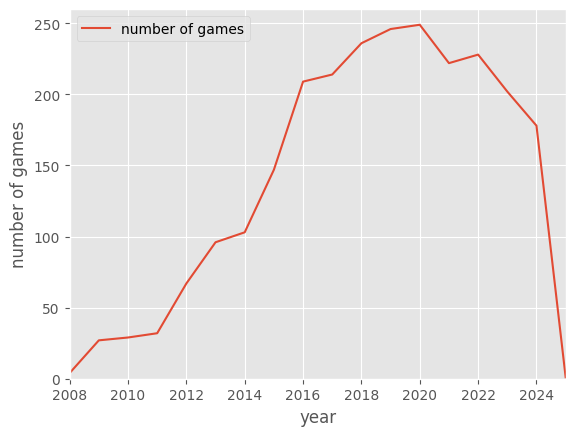

In [18]:
# create the plot here
games_in_year_df.plot.line(x = 'year', y = 'number of games')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('number of games')
plt.ylim(0, 260)
plt.show()

### Task 2.10: Yearly average

Compute the average rating per year for all major games.\
Use the numbers you computed to plot a line chart. Plot the year on x-axis and the average rating on y-axis.  

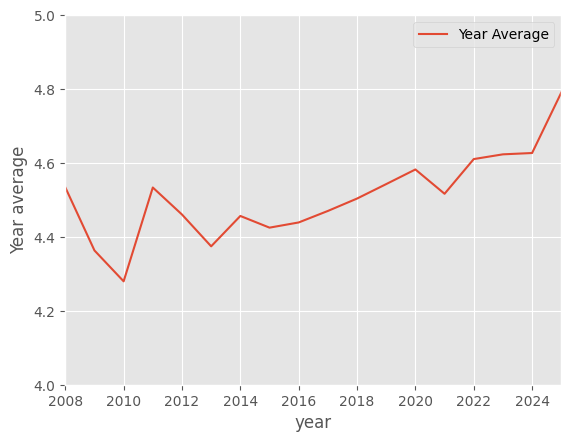

In [19]:
# your code goes here
year_ave = []
for i in range(2008, 2026):
    year_rating = major_df[major_df['Year'] == i]['Rating'].tolist()
    year_ave.append(sum(year_rating)/ len(year_rating))

games_in_year_df['Year Average'] = year_ave
games_in_year_df.head()

games_in_year_df.plot.line(x = 'year', y = 'Year Average')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('Year average')
plt.ylim(4, 5)
plt.show()

### Task 2.11: Explore and Interpret

Why is there so much spread (zig-zag) in the number of ratings in earlier years?

Is 250 ratings a good threshold for the title 'major' games? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of ratings per year, the average number of ratings for a game in a particular year, etc. 

In [31]:
# your code goes here

#Total number of ratings per year
year_totalnum = []
for i in range(2008, 2026):
    year_num = major_df[major_df['Year'] == i]['Number of Ratings'].tolist()
    year_totalnum.append(sum(year_num))

games_in_year_df['Year Num of Ratings'] = year_totalnum
games_in_year_df.head()

year  number of games  Year Average  Year Num of Ratings
0  2008                4      4.534145                 4046
1  2009               27      4.363289              1568983
2  2010               29      4.279736               212920
3  2011               32      4.533581               129580
4  2012               67      4.460494              3450596

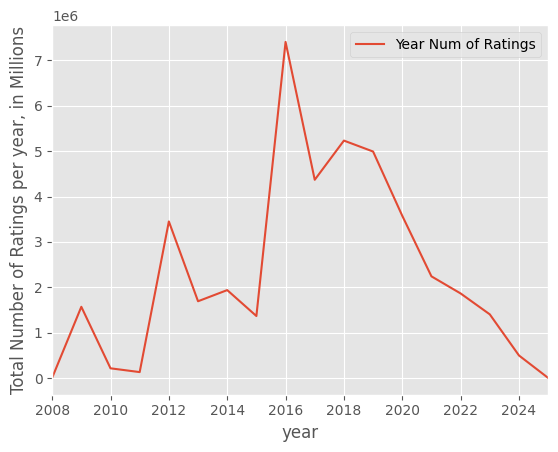

In [39]:
games_in_year_df.plot.line(x = 'year', y = 'Year Num of Ratings')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('Total Number of Ratings per year, in Millions')

plt.show()


In [37]:
#Average number of game ratings per year
year_ave_rate = []
for i in range(2008, 2026):
    year_num = major_df[major_df['Year'] == i]['Number of Ratings'].tolist()
    year_ave_rate.append(sum(year_num)/ len(year_num))

games_in_year_df['Average Number of Ratings for Games by Year'] = year_ave_rate
games_in_year_df.head()

year  number of games  Year Average  Year Num of Ratings  \
0  2008                4      4.534145                 4046   
1  2009               27      4.363289              1568983   
2  2010               29      4.279736               212920   
3  2011               32      4.533581               129580   
4  2012               67      4.460494              3450596   

   Average Number of Ratings for Games by Year  
0                                  1011.500000  
1                                 58110.481481  
2                                  7342.068966  
3                                  4049.375000  
4                                 51501.432836

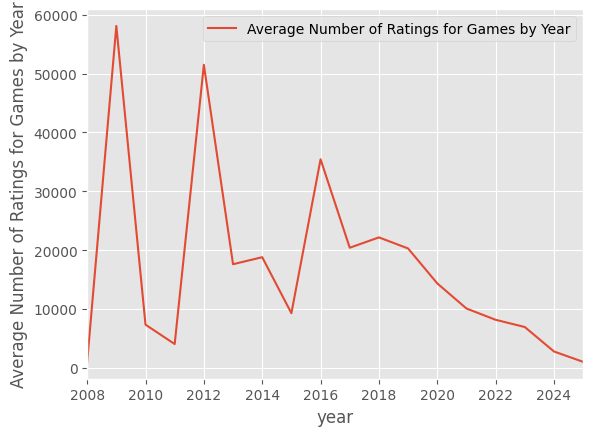

In [38]:
games_in_year_df.plot.line(x = 'year', y = 'Average Number of Ratings for Games by Year')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('Average Number of Ratings for Games by Year')

plt.show()

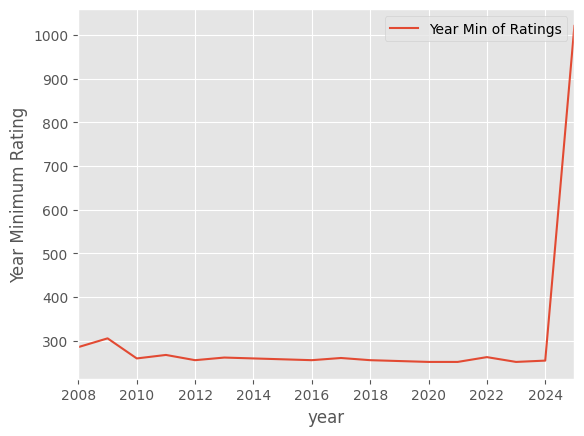

In [48]:
#Game with least amount of rating every year
year_min = []
for i in range(2008, 2026):
    year_num = major_df[major_df['Year'] == i]['Number of Ratings'].tolist()
    year_min.append(min(year_num))

games_in_year_df['Year Min of Ratings'] = year_min
games_in_year_df.head()

games_in_year_df.plot.line(x = 'year', y = 'Year Min of Ratings')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('Year Minimum Rating')

plt.show()

**Your interpretation**: \
The first thing to note is that the zig-zag is from 4.5 - 4.3, so this isn't too much a fluctuation in ratings, but our graph is zoomed in to see the changes of average rating. \
We see some volatility in the first few years in total number of ratings per year and in the average number of ratings for a game by year. This volatility of a lot of reviews per game and in total is causing us to see the spread (volatility/zig-zag) in the average rating in the first few years. \
I checked to see the minimum rating by year, we see that from 2010-2024 most games were just above 250 ratings. I propose we raise the level of minimum ratings to 400 and see how the data changes. 

2093 games have more than 400 ratings.


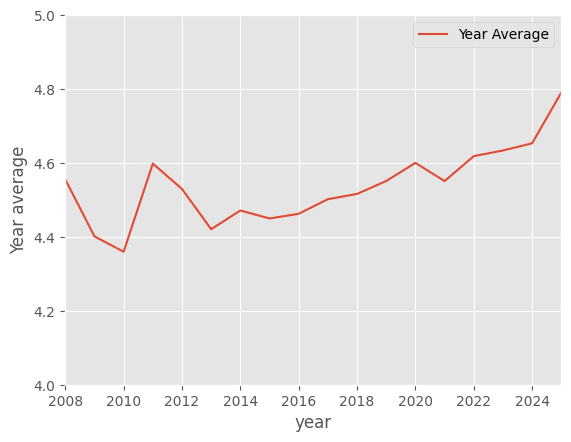

In [59]:
#raise minimum amount of ratings to 400
raise_df = games_df.loc[games_df['Number of Ratings'] > 400]
print(len(raise_df), 'games have more than 400 ratings.')

year = [] 
for i in range(2008, 2026):
    year.append(i)

num_game = []
for i in range(2008, 2026):
    num_game.append(raise_df[raise_df['Year'] == i].shape[0])

raise_in_year_df = pd.DataFrame({'year':year, 'number of games': num_game})


year_ave = []
for i in range(2008, 2026):
    year_rating = raise_df[raise_df['Year'] == i]['Rating'].tolist()
    year_ave.append(sum(year_rating)/ len(year_rating))

raise_in_year_df['Year Average'] = year_ave

raise_in_year_df.plot.line(x = 'year', y = 'Year Average')
plt.xlabel('year')
plt.xlim(2008,2025)
plt.ylabel('Year average')
plt.ylim(4, 5)
plt.show()

**Your interpretation (continued)**: \
When we raise the minimum number of ratings to 400, we still see some zig zag in the first few years of the rating. The Average does raise slighly for most years, but this doesn't change the volatility. Becasue of this I do **not** believe it is neccesary or needed to raise the minimum number of ratings from 250 to 400.

## Task 3 Reflecting

Succinctly describe what you referenced to help you do the assignment and what the biggest challenges were.

**Reflecting:** \
I went to Chang's office hours on thursday evening to get help with the "2.3 compare the runtime" question.
My first resource when running into issues was googling the documentation and trying to find my answer in there. After trying to read the documentation if I didn't under stand it or if I had an idea that I didnt know how to execute I would try googling it. From there if I was running into a syntax error I would put it into chatGPT and ask why the syntax was not functioning correctly to help me find minor errors. \
The biggest challenges I ran into was how the time function worked, hence why I needed help in office hours. After that, I often times couldn't conceptualize in my mind what I was subsetting from the dataframe when the documentation would say to use axis = 1/0, I couldn't tell what was supposed to represent rows vs columns and how to properly pull out the columns I wanted. After a few practices with subsetting the data frame I felt that I had a better understanding of what was happening. \
From 2.9 on, I felt what I was doing was not the most efficient way, but I enjoyed what I was doing and it felt like I was getting into what the data was doing. I hope to find more effcient ways as I learn more.